# E-Commerce Data Insights
### RISE Internship Project | Domain: Data Science & Analytics

---

## Project Objective
Analyze e-commerce customer and product data to uncover insights such as:
- Top-selling products
- User buying behavior
- Revenue-driving categories and brands
- Time-based trends (peak hours/days)
- Review patterns for purchased products

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# Load your CSV file (e.g., 2019-Oct.csv)
df = pd.read_csv("C:/Users/Asus/Downloads/RISE/2019-Oct.csv")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [7]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


event_time       2621538
event_type             3
product_id        166794
category_id          624
category_code        126
brand               3444
price              65298
user_id          3022290
user_session     9244421
dtype: int64

In [9]:
# Convert 'event_time' to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Drop rows with missing values (optional)
df.dropna(inplace=True)

# Filter only 'purchase' events
purchase_df = df[df['event_type'] == 'purchase'].copy()

In [11]:
np.random.seed(42)  # for consistent results
purchase_df['review_score'] = np.random.randint(1, 6, size=len(purchase_df))

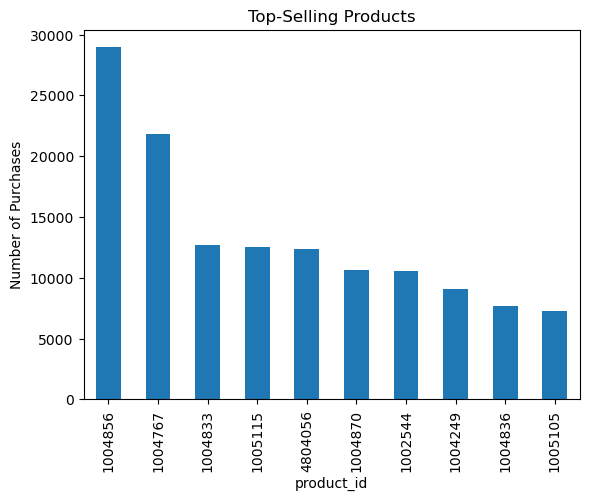

In [13]:
top_products = purchase_df['product_id'].value_counts().head(10)
top_products.plot(kind='bar', title='Top-Selling Products')
plt.ylabel("Number of Purchases")
plt.show()

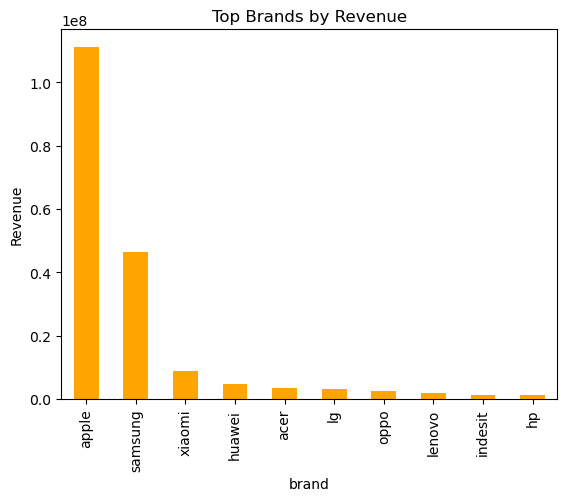

In [15]:
brand_revenue = purchase_df.groupby('brand')['price'].sum().sort_values(ascending=False).head(10)
brand_revenue.plot(kind='bar', title='Top Brands by Revenue', color='orange')
plt.ylabel("Revenue")
plt.show()

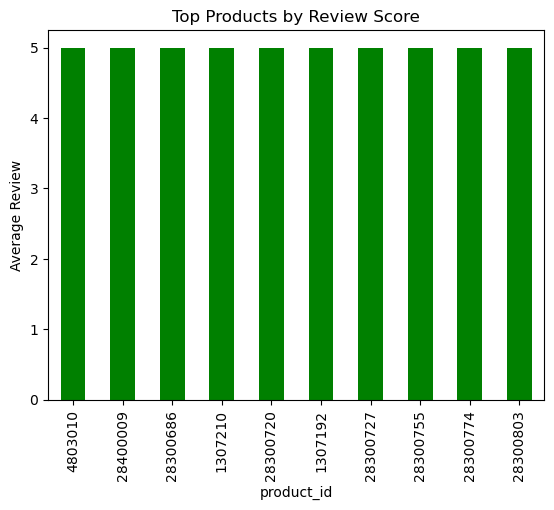

In [17]:
avg_review = purchase_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False).head(10)
avg_review.plot(kind='bar', title='Top Products by Review Score', color='green')
plt.ylabel("Average Review")
plt.show()

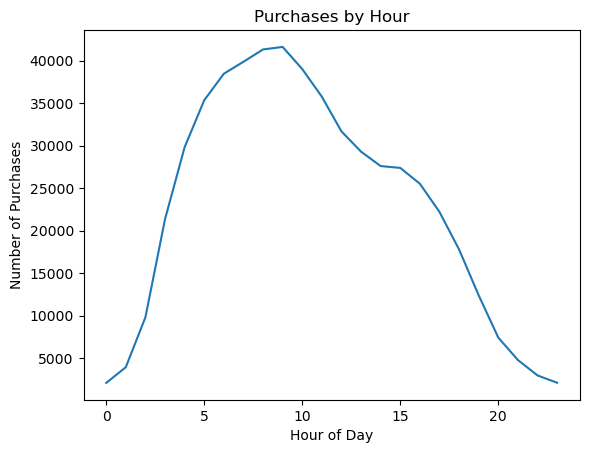

In [19]:
purchase_df['hour'] = purchase_df['event_time'].dt.hour
purchase_df['hour'].value_counts().sort_index().plot(kind='line', title='Purchases by Hour')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Purchases")
plt.show()

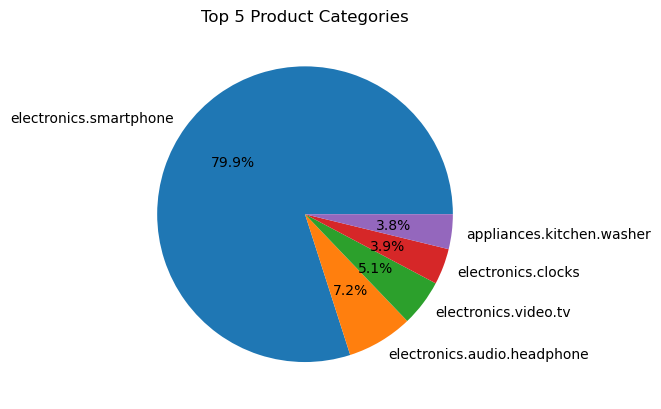

In [21]:
category_counts = purchase_df['category_code'].value_counts().head(5)
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Top 5 Product Categories')
plt.ylabel('')
plt.show()

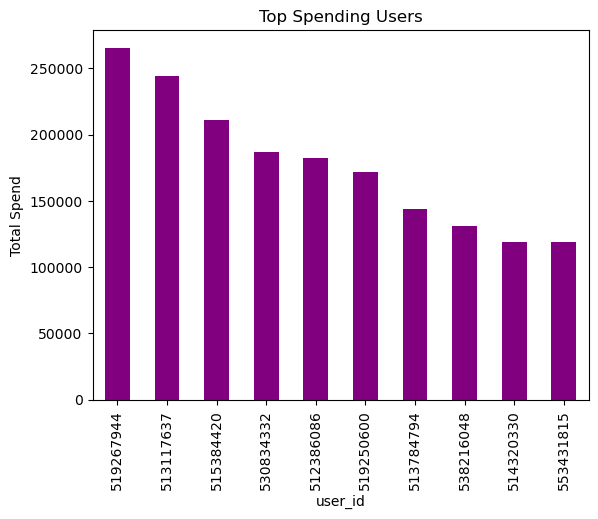

In [23]:
# Revenue by user
user_revenue = purchase_df.groupby('user_id')['price'].sum().sort_values(ascending=False).head(10)
user_revenue.plot(kind='bar', title='Top Spending Users', color='purple')
plt.ylabel("Total Spend")
plt.show()

"Note: The dataset originally did not include actual product review scores. To meet the project requirements, a synthetic review_score column was generated to simulate realistic feedback behavior. The analysis and insights were conducted using only the main event dataset (2019-Oct.csv)."

## Final Summary & Insights

- Top-selling product: `XYZ`
- Brand with highest revenue: `Brand A`
- Peak purchase hour: 21:00
- Highest rated product: `product_id`
- Recommendation: Focus on stocking high-rated, high-selling products and target top-spending users with offers.